# Seaborn
- matplotlib을 기반으로 다양한 테마와 그래프를 제공하는 파이썬 시각화 패키지.-
- http://seaborn.pydata.org/
    - 공식 사이트의 [gallary](http://seaborn.pydata.org/examples/index.html)에 제공하는 다양한 그래프와 예제를 확인 할 수 있다.
- 설치: 아나콘다에는 포함되있다.
```
pip install seaborn
conda install seaborn
```
    

In [1]:
!pip install seaborn

     |████████████████████████████████| 292 kB 8.8 MB/s eta 0:00:01


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore') # 실행시 뜨는 경고메세지는 무시해라

In [7]:
df = pd.read_csv('data/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
tips = sns.load_dataset('tips') # seaborn 제공하는 toy dataset을 DataFrame으로 가져오는 함수.(tips: 팁 데이터셋)
# toy dataset: 패키지에 사용할 수 있는 연습용 공개데어터
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## rugplot, kdeplot, distplot
- 1차원 연속형 값들의 분포를 시각화 하는 그래프

### rugplot 
- 각 데이터들의 위치를 보여준다.

In [9]:
tips['total_bill'] # 연속형

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

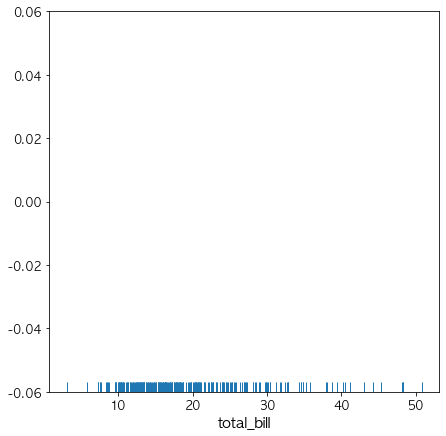

In [13]:
plt.figure(figsize=(7,7))
sns.rugplot(tips['total_bill'])
plt.show()
# histogram과 같이 시각화해서 각 계급(bin, group별 범위)안에서의 값 분포를 확인할 수 있다.

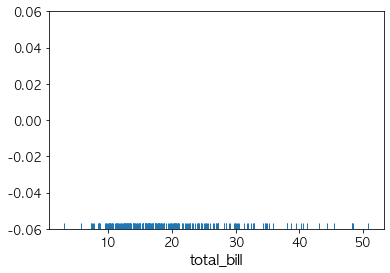

In [16]:
# seaborndms dataframe과 연동이 matplotlib보다 쉽다.
# 그래프를 그릴때 사용할 값에다 컬럼명을 지정, data=DataFrame을 지정.
sns.rugplot('total_bill', data=tips)
plt.show()

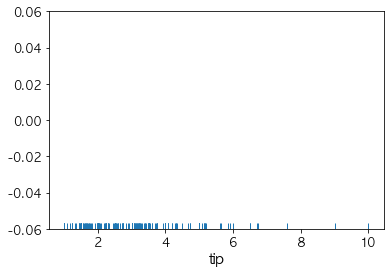

In [17]:
sns.rugplot('tip',data=tips)
plt.show()

### kdeplot
- 히스토그램을 부드러운 곡선 형태로 표현한다. 
- KDE(Kernel Density Estimation) : 확률밀도추정

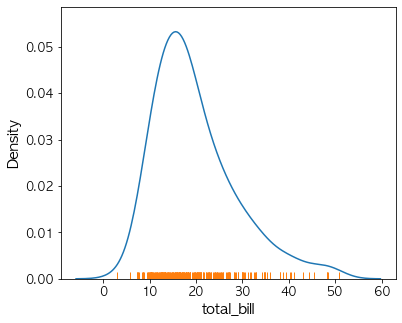

In [21]:
plt.figure(figsize=(6,5))
# sns.kdeplot(tips['total_bill'])
sns.kdeplot('total_bill',data=tips)  # y축: 수량의 비율
sns.rugplot('total_bill',data=tips)
plt.show()

### distplot
- 히스토그램에 kdeplot, rugplot 한번에 그린다.
    - kdeplot은 default로 나오고 rugplot은 default로 안나온다.

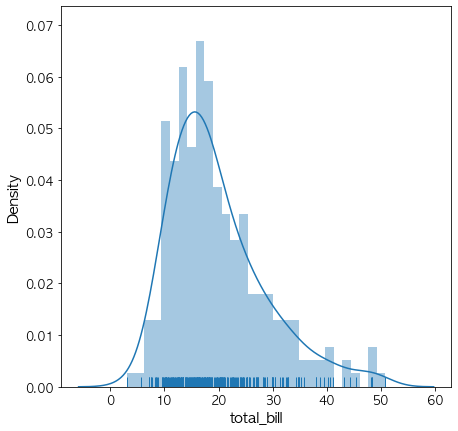

In [25]:
plt.figure(figsize=(7,7))
sns.distplot(tips['total_bill'],       # 컬럼명, data=DF 형식으로 호출할 수 없다
             hist=True,      # 히스토그램을 그릴지 여부(default = True)
             kde=True,       # kdeplot을 그릴지 여부(default = True)
             rug=True,       # rugplot을 그릴지 여부(default = False)
             bins=30         # histogram의 bins의 개수
            )    
plt.show()

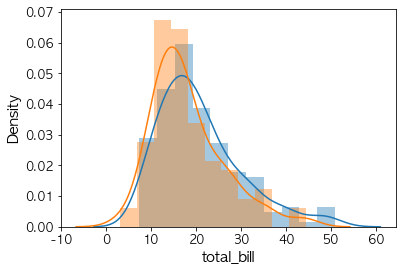

In [31]:
a = tips.loc[tips['sex'] == 'Male','total_bill'] # 남성의 total_bill
b = tips.loc[tips['sex'] == 'Female','total_bill'] # 여성의 total_bill
sns.distplot(a)
sns.distplot(b)
plt.show()

<Figure size 504x504 with 0 Axes>

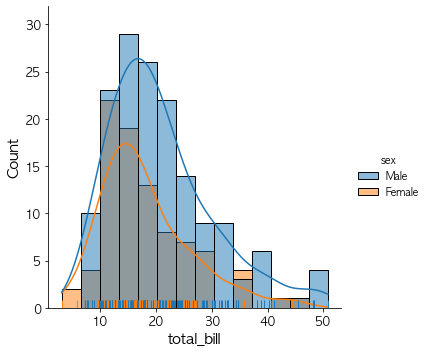

In [37]:
# group별로 나눠서 히스토그램, rufgplot, kdeplot등을 확인
# displot() - group별로 나눠서 시각화. (distplot(x): 하나의 컬럼에 대해서만 시각화)
# 남성/여성 별 total_bill 분포를 비교
plt.figure(figsize=(7,7))
sns.displot(x='total_bill',hue='sex', data=tips,
            kde=True, rug=True)   # kde,rug: default-False
plt.show()

## boxplot(), violinplot(), swamplot()
- 연속형 데이터(양적데이터)들의 분포를 확인하는 그래프를 그린다.
- 범주별로 연속형 데이터의 분포를 비교할 수 있다.

### boxplot

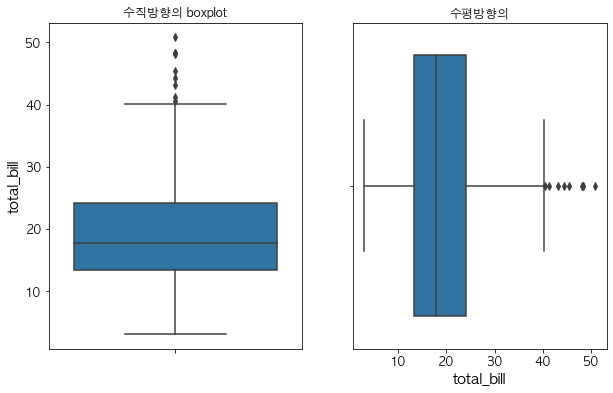

In [40]:
plt.figure(figsize=(10,6))
# 하나의 figure 2개의 axes를 이용해 시각화
plt.subplot(1,2,1)
# sns.boxplot(y=tips['total_bill'])
sns.boxplot(y='total_bill',data=tips) #dataframe과 컬럼명 분리해 설정
plt.title('수직방향의 boxplot')

plt.subplot(1,2,2)
sns.boxplot(x=tips['total_bill'])
plt.title('수평방향의')
plt.show()

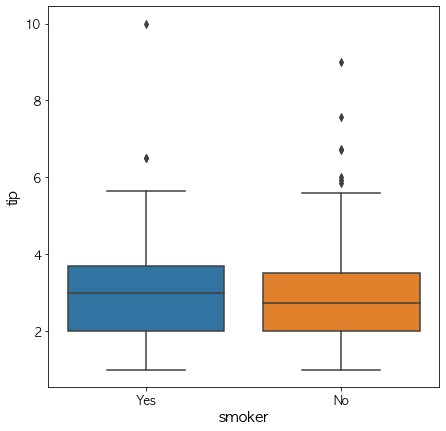

In [41]:
# 흡연여부별 tip의 분포를 boxplot 비교 - 한 axes 시각화
plt.figure(figsize=(7,7))
# 수직
sns.boxplot(y='tip', x='smoker', data=tips)
plt.show()

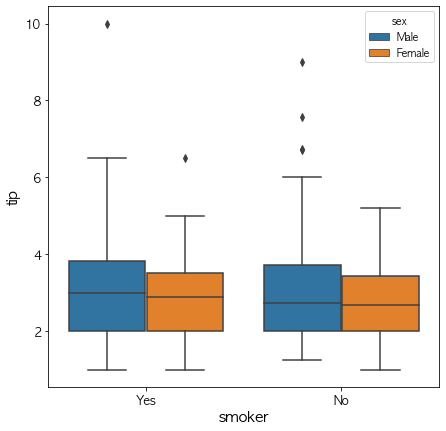

In [42]:
# 흡연 + 성별 tip 분포를 boxplot
plt.figure(figsize=(7,7))
sns.boxplot(y='tip',x='smoker',hue='sex',data=tips)
plt.show()

### violin plot
- boxplot 위에 분포 밀도(kernel density)를 좌우 대칭으로 덮어쓰는 방식으로 데이터의 분포를 표현하므로 boxplot 보다 좀더 정확한 데이터의 분포를 볼 수 있다.
- 매개변수는 boxplot과 동일

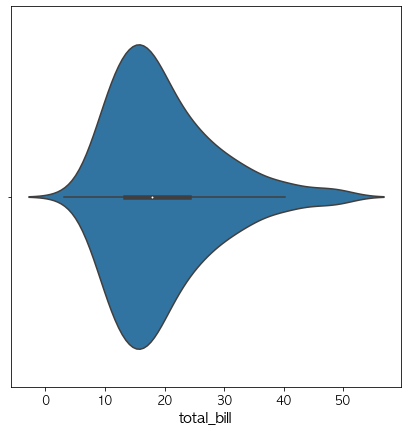

In [44]:
plt.figure(figsize=(7,7))
# sns.violinplot(y='total_bill',data=tips)
sns.violinplot(x='total_bill',data=tips)

plt.show()

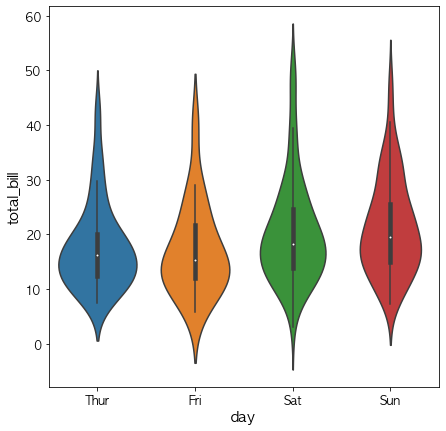

In [45]:
# 요일(data)별 분포
plt.figure(figsize=(7,7))
sns.violinplot(y='total_bill',x='day',data=tips)

plt.show()

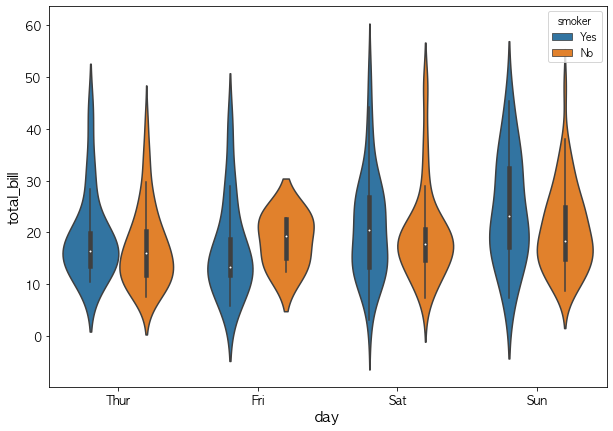

In [46]:
# 요일, 흡연 별 분포
plt.figure(figsize=(10,7))
sns.violinplot(y='total_bill',x='day', hue='smoker', data=tips)

plt.show()


### swarmplot
- 실제 값들을 점으로 찍어 준다. 
- boxplot이나 violin plot의 보안해주는 역할로 쓰인다.
- swarmplot은 가운데 분류를 기준으로 분포시키는데 실제 값이 있는 위치에 점을 찍으므로 좀더 정확하게 값이 어디에 있는지 알 수 있다.

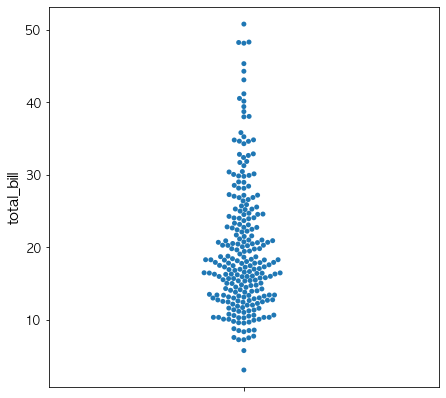

In [48]:
plt.figure(figsize=(7,7))
sns.swarmplot(y='total_bill', data=tips)
plt.show()

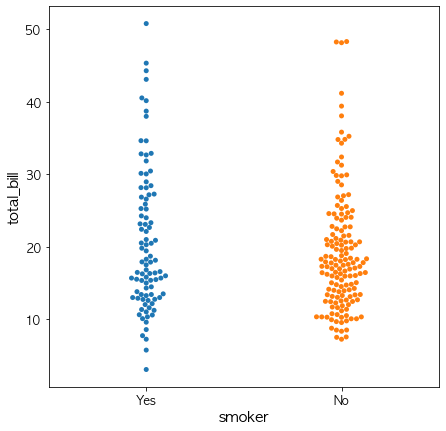

In [49]:
plt.figure(figsize=(7,7))
sns.swarmplot(y='total_bill', x='smoker', data=tips)
plt.show()

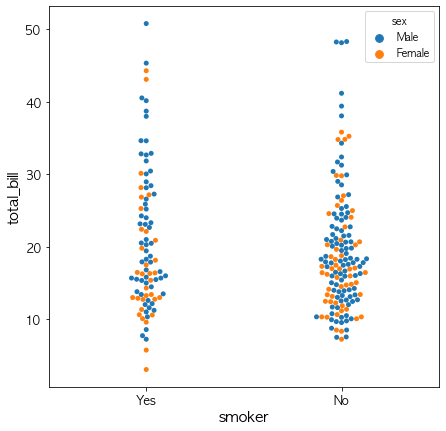

In [50]:
plt.figure(figsize=(7,7))
sns.swarmplot(y='total_bill', x='smoker', hue='sex' ,data=tips)
plt.show()

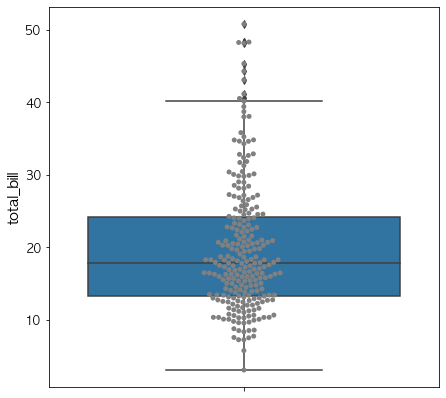

In [53]:
plt.figure(figsize=(7,7))
sns.boxplot(y='total_bill',data=tips)
sns.swarmplot(y='total_bill', data=tips, color='grey')

plt.show()

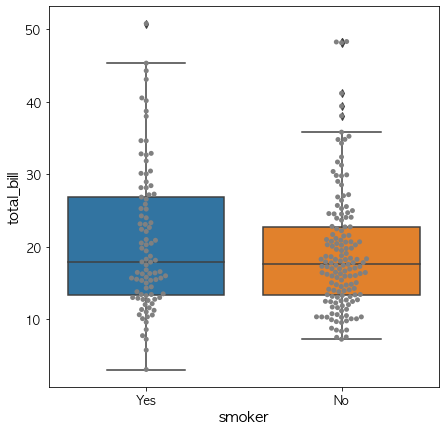

In [56]:
plt.figure(figsize=(7,7))
sns.boxplot(y='total_bill', x='smoker', data=tips)
sns.swarmplot(y='total_bill', x='smoker', data=tips, color='gray')
plt.show()

### countplot() 
- 막대그래프(bar plot)을 그리는 함수
- 범주형 변수의 고유값의 개수를 표시
- matplotlib의 bar()

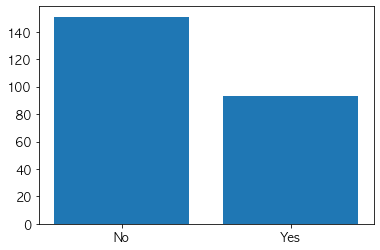

In [59]:
# matplotlib
# 개수를 세는 작업을 한뒤에 그 결과로 시각화
vc=tips['smoker'].value_counts()
plt.bar(vc.index,vc)
plt.show()

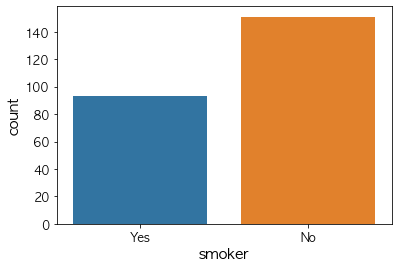

In [60]:
sns.countplot(x='smoker',data=tips)  # 범주형 컬럼을 x에 전달: 범주값별로 개수를 세서 막대그래프를 그린다
plt.show()

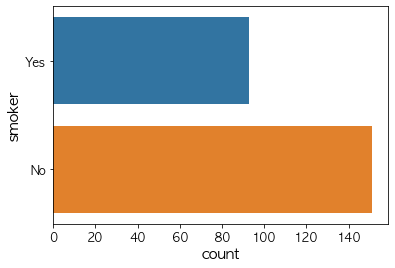

In [61]:
sns.countplot(y='smoker',data=tips) # y= 컬럼명: 수평막대그래프, x=컬럼명 : 수직 막대그래프
plt.show()

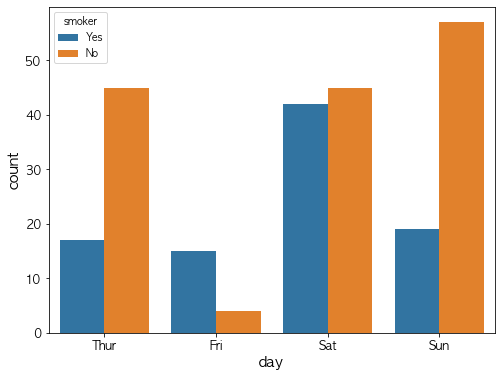

In [63]:
# 요일별 흡연자/비흡연자 수
plt.figure(figsize=(8,6))
sns.countplot(x='day', hue='smoker', data=tips)
plt.show()

## scatterplot, lmplot, jointplot, pairplot
- 산점도를 그린다.

### scatterplot

팔레트 - https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

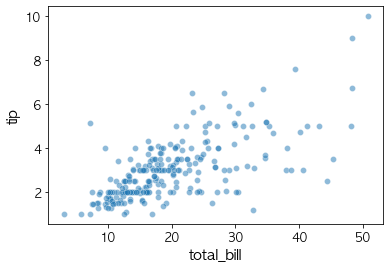

In [65]:
# total_bill과 tip 관계
sns.scatterplot(x='total_bill',y='tip',data=tips, alpha=0.5)
plt.show()

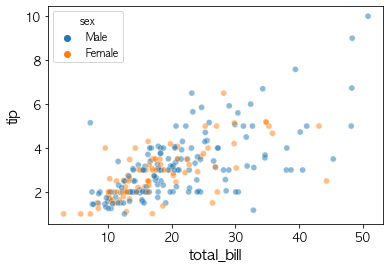

In [66]:
# total_bill과 tip 관계 성별로 나눠서
sns.scatterplot(x='total_bill',y='tip',hue='sex',data=tips, alpha=0.5)
plt.show()

### lmplot()
- 선형회귀 적합선을 포함한 산점도를 그린다.
> 선형회귀 적합선: 상관관계를 가장 잘표현할 수 있는 선을 같이 그려준다.

<Figure size 504x504 with 0 Axes>

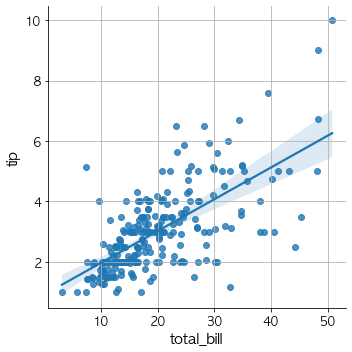

In [70]:
plt.figure(figsize=(7,7))
sns.lmplot(x='total_bill', y='tip', data=tips)
plt.grid(True)
plt.show()

<Figure size 504x504 with 0 Axes>

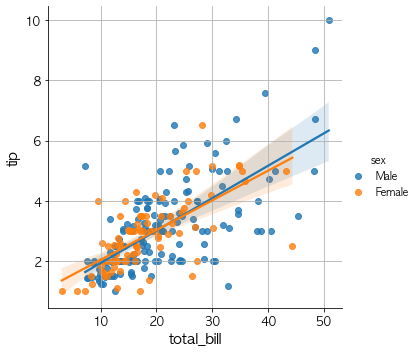

In [71]:
plt.figure(figsize=(7,7))
sns.lmplot(x='total_bill', y='tip', hue='sex',data=tips)
plt.grid(True)
plt.show()

### jointplot()
- scatter plot 과 각 변수의 히스토그램을 같이 그린다.
- pandas **DataFrame**만 사용할 수 있다.
- DataFrame

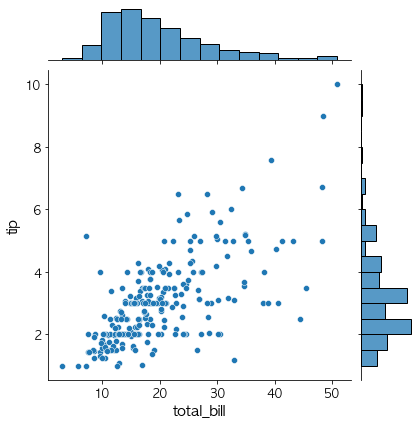

In [72]:
sns.jointplot(x='total_bill',y='tip', data=tips)
plt.show()

### pairplot
- 다변수(다차원) 데이터들 간의 산점도를 보여준다. 
- 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 변수간의 산점도를 그린다. 같은 변수가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그린다.

<Figure size 1080x1080 with 0 Axes>

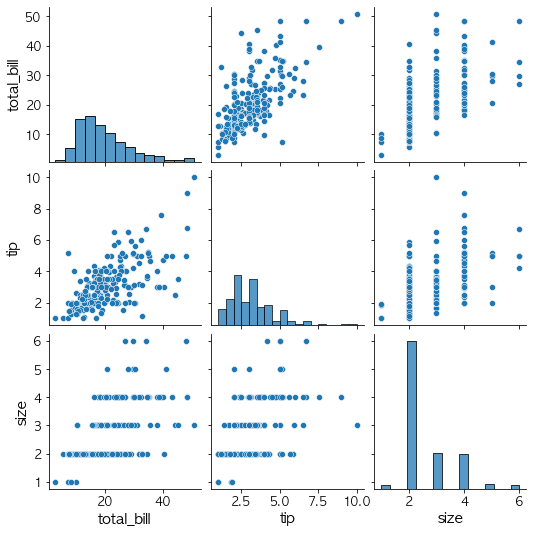

In [74]:
plt.figure(figsize=(15,15))
sns.pairplot(tips) # 매개변수: dataframe,  수치형 컬럼들만 이용해서 그린다.
plt.show()

### heatmap()
- 값들에 비례해서 색깔을 다르게 해 2차원 자료로 시각화

In [77]:
# 'total_bill','tip','size' 컬럼간의 상관계수
corr_df = tips[['total_bill','tip','size']].corr() 
corr_df

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


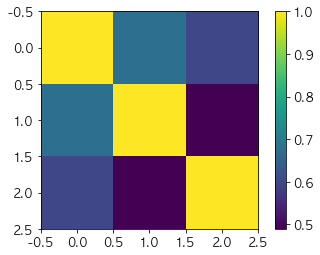

In [80]:
# matplotlib - imshow() im:image -> pixcel값(정수)을 reandering(이미지화)
plt.imshow(corr_df)
plt.colorbar()
plt.show()

In [ ]:
# cmap: colormap/palette - 미리 사용할 색들을 모아놓은것.

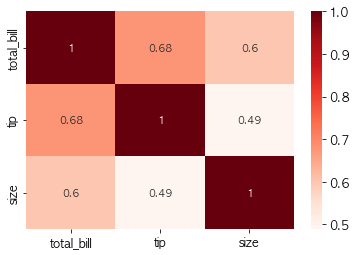

In [85]:
# seaborn: heatmap()
sns.heatmap(corr_df, annot=True, cmap='Reds')
plt.show()

### lineplot
- 선그래프
- 시간의 흐름에 따른 값의 변화를 보여주는데 유용하다. (시계열 데이터)

In [88]:
web_df = pd.read_excel('data/webbrowser_share.xls',converters={'date':np.str})
web_df.set_index('date',inplace=True)

In [89]:
web_df.head()

,Chrome,IE,Edge,Safari,Whale Browser,Firefox,Opera,Swing,Phantom,UC Browser,...,QQ Browser,Vivaldi,360 Safe Browser,Maxthon,Coc Coc,Puffin,Yandex Browser,Sogou Explorer,Mozilla,Whale
date,,,,,,,,,,,,,,,,,,,,,
2018.08,59.12,31.06,2.97,2.52,1.36,1.26,0.88,0.39,0.25,0.03,...,0.02,0.02,0.02,0.02,0.00,0.00,0.01,0.01,0.00,0.0
2018.09,61.95,27.84,3.16,2.19,1.27,2.57,0.40,0.37,0.00,0.03,...,0.03,0.02,0.06,0.02,0.00,0.00,0.02,0.03,0.00,0.0
2018.10,62.05,28.36,3.35,2.43,1.28,1.36,0.59,0.35,0.00,0.03,...,0.02,0.02,0.02,0.02,0.01,0.00,0.01,0.03,0.01,0.0
2018.11,65.31,26.29,3.06,2.09,1.16,1.10,0.55,0.26,0.00,0.02,...,0.02,0.02,0.02,0.02,0.01,0.01,0.00,0.02,0.01,0.0
2018.12,68.34,22.31,2.99,2.02,1.11,2.04,0.63,0.25,0.00,0.03,...,0.04,0.01,0.02,0.02,0.03,0.01,0.04,0.02,0.00,0.0


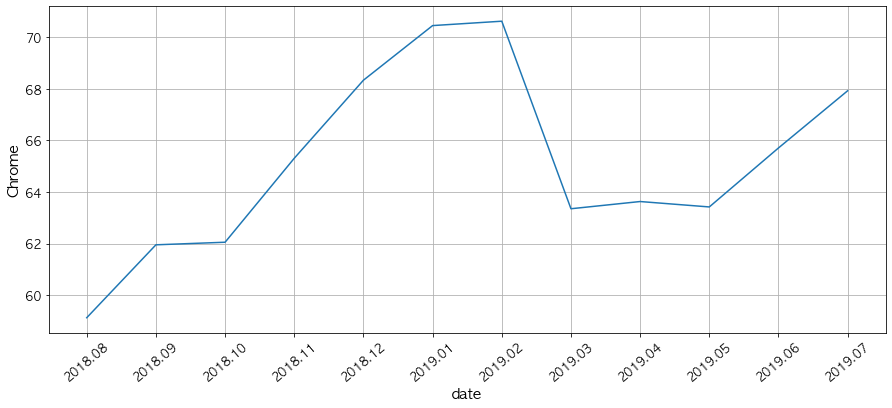

In [94]:
# sns.lineplot(x=시간컬럼, y=변화값컬럼)
#x에 dataframe의 index를 사용해야하는 경우 => 따로 조회해서 넣어준다
plt.figure(figsize=(15,6))
sns.lineplot(x=web_df.index, y='Chrome', data=web_df)
plt.xticks(rotation=40) # tick 라벨을 40도 돌려라
plt.grid(True)
plt.show()

In [95]:
df2 = web_df[web_df.columns[:4]]
df2 # 데이터프레임

,Chrome,IE,Edge,Safari
date,,,,
2018.08,59.12,31.06,2.97,2.52
2018.09,61.95,27.84,3.16,2.19
2018.10,62.05,28.36,3.35,2.43
2018.11,65.31,26.29,3.06,2.09
2018.12,68.34,22.31,2.99,2.02
2019.01,70.46,21.05,2.99,2.07
2019.02,70.63,20.71,2.68,2.53
2019.03,63.35,25.42,3.81,3.16
2019.04,63.63,24.65,4.08,3.11


<AxesSubplot:xlabel='date'>

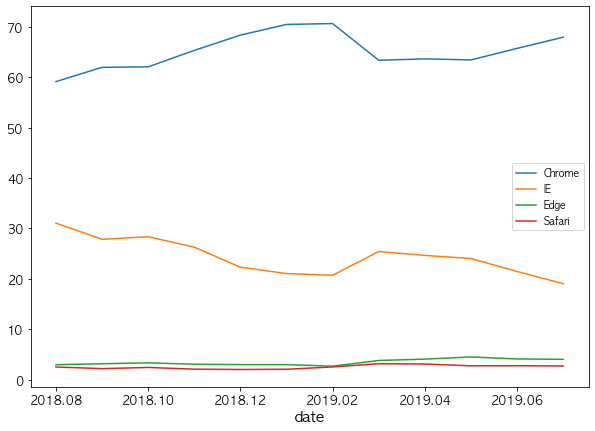

In [96]:
# plt.figure(figsize=(10,7))
df2.plot(kind='line', figsize=(10,7))

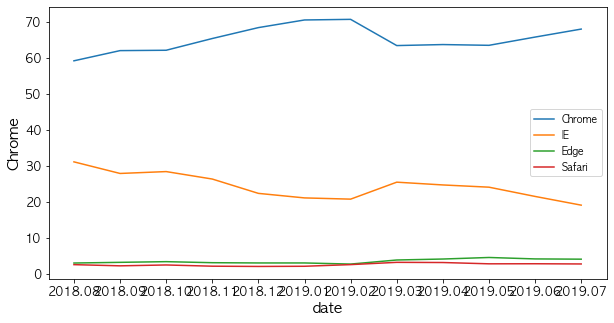

In [98]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df2.index, y='Chrome', data=df2, label='Chrome')
sns.lineplot(x=df2.index, y='IE', data=df2, label='IE')
sns.lineplot(x=df2.index, y='Edge', data=df2, label='Edge')
sns.lineplot(x=df2.index, y='Safari', data=df2, label='Safari')
plt.show()